In [ ]:
#Usando los integradores de Scipy, integre el sistema de ecuaciones diferenciales con el siguiente orden:
#y = [φ, ψ, θ, θ ̇] con la condicio ́n inicial: y0 = [0, 0, π/4, 0]. El intervalo de integracio ́n es t ∈ [0,8] s. Use los siguientes param ́etros del sistema: m = 0.1 kg, r = 0.1 m, d = 0.3 m, g = 9.81 m/s2, ψ ̇ = 400 rad/s. Adicionalmente, para integrar las ecuacio ́n debe encontrar los momentos can ́onicos: pφ = Izψ ̇ cosθ0, pψ = Izψ ̇.

<IPython.core.display.Javascript object>


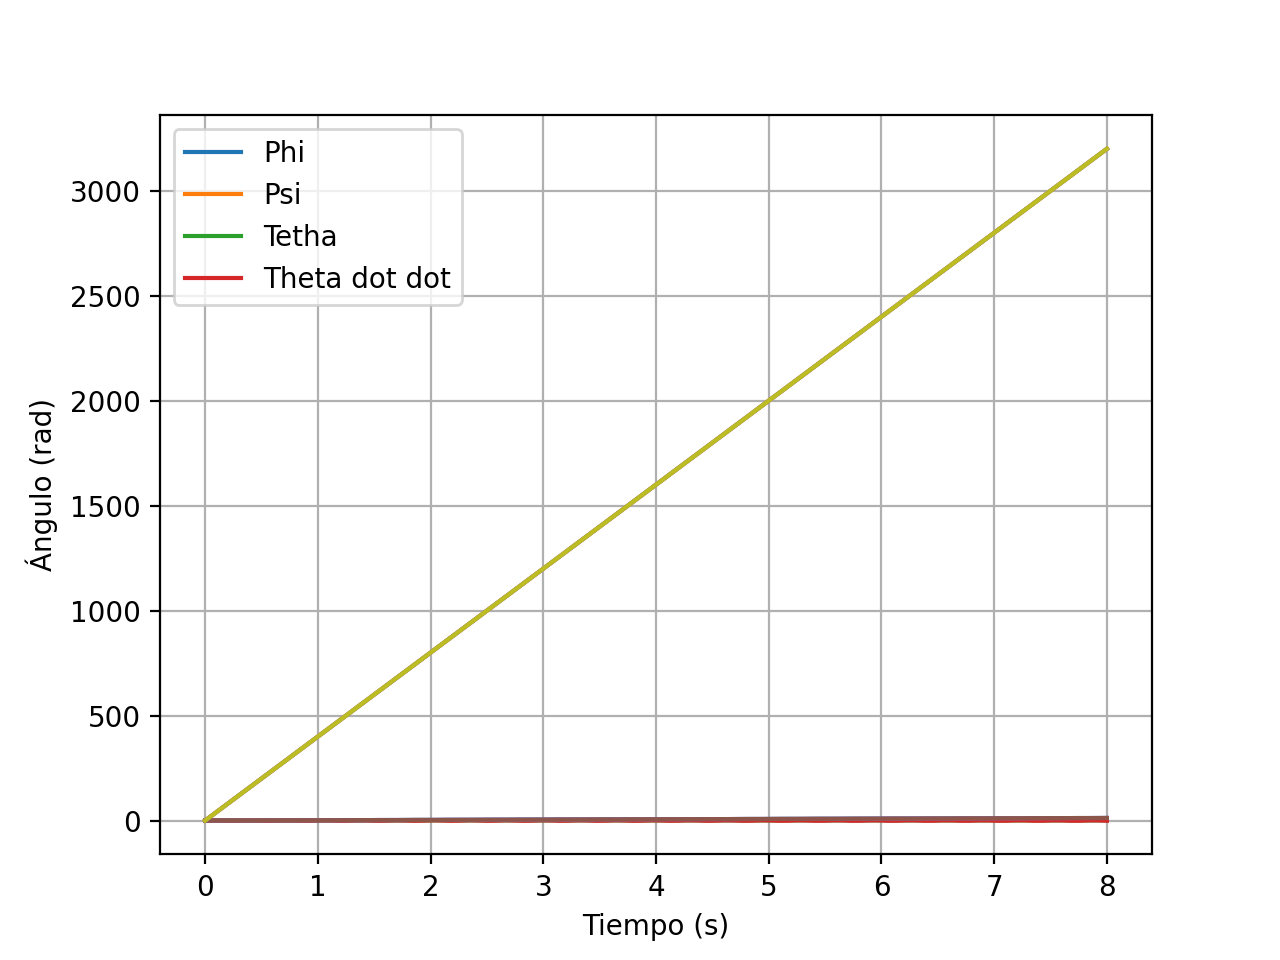

In [6]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.animation as anim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
#dLdpsi = Iz * (psi_dot + phi_dot * np.cos(tetha))

 

def System (y, t, m=0.1, d=0.3, r=0.1,g=9.81, psi_d=400):
    
    Io= (0.25)*(m*r**2) + m*d**2
    Iz= (0.5)*(m*r**2)
    
    phi,psi,tetha,tetha_d = y

    psi_dot= psi_d
    phi_dot= ((Iz*psi_dot*np.cos(np.pi/4)) - (Iz*psi_dot*np.cos(tetha)))/((Io * np.sin(tetha)**2) + Iz * np.cos(tetha)**2)
    tetha_dot=tetha_d
    tetha_dot_dot = (phi_dot**2 * (np.sin(tetha) * np.cos(tetha)) * (Io - Iz) - phi_dot * psi_dot * Iz * np.sin(tetha) + m*g*d*np.sin(tetha))/Io

    return [phi_dot, psi_dot , tetha_dot, tetha_dot_dot]


t = np.linspace(0, 8, 100)
y0 = [0, 0, np.pi/4, 0]
sol = odeint(System, y0, t)

phi_sol = sol[:, 0]
psi_sol = sol[:, 1]
tetha_sol = sol[:, 2]
tetha_two= sol[:, 3]

plt.plot(t, phi_sol, label='Phi')
plt.plot(t, psi_sol, label='Psi')
plt.plot(t, tetha_sol, label='Tetha')
plt.plot(t, tetha_two, label='Theta dot dot')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.grid(True)

In [10]:
plt.plot(t, phi_sol, label='Phi')
plt.show()

In [8]:
d = 0.3
x = d*np.sin(tetha_sol)*np.sin(phi_sol)
y = d*np.sin(tetha_sol)*np.cos(phi_sol)
z = d*np.cos(tetha_sol)

<IPython.core.display.Javascript object>


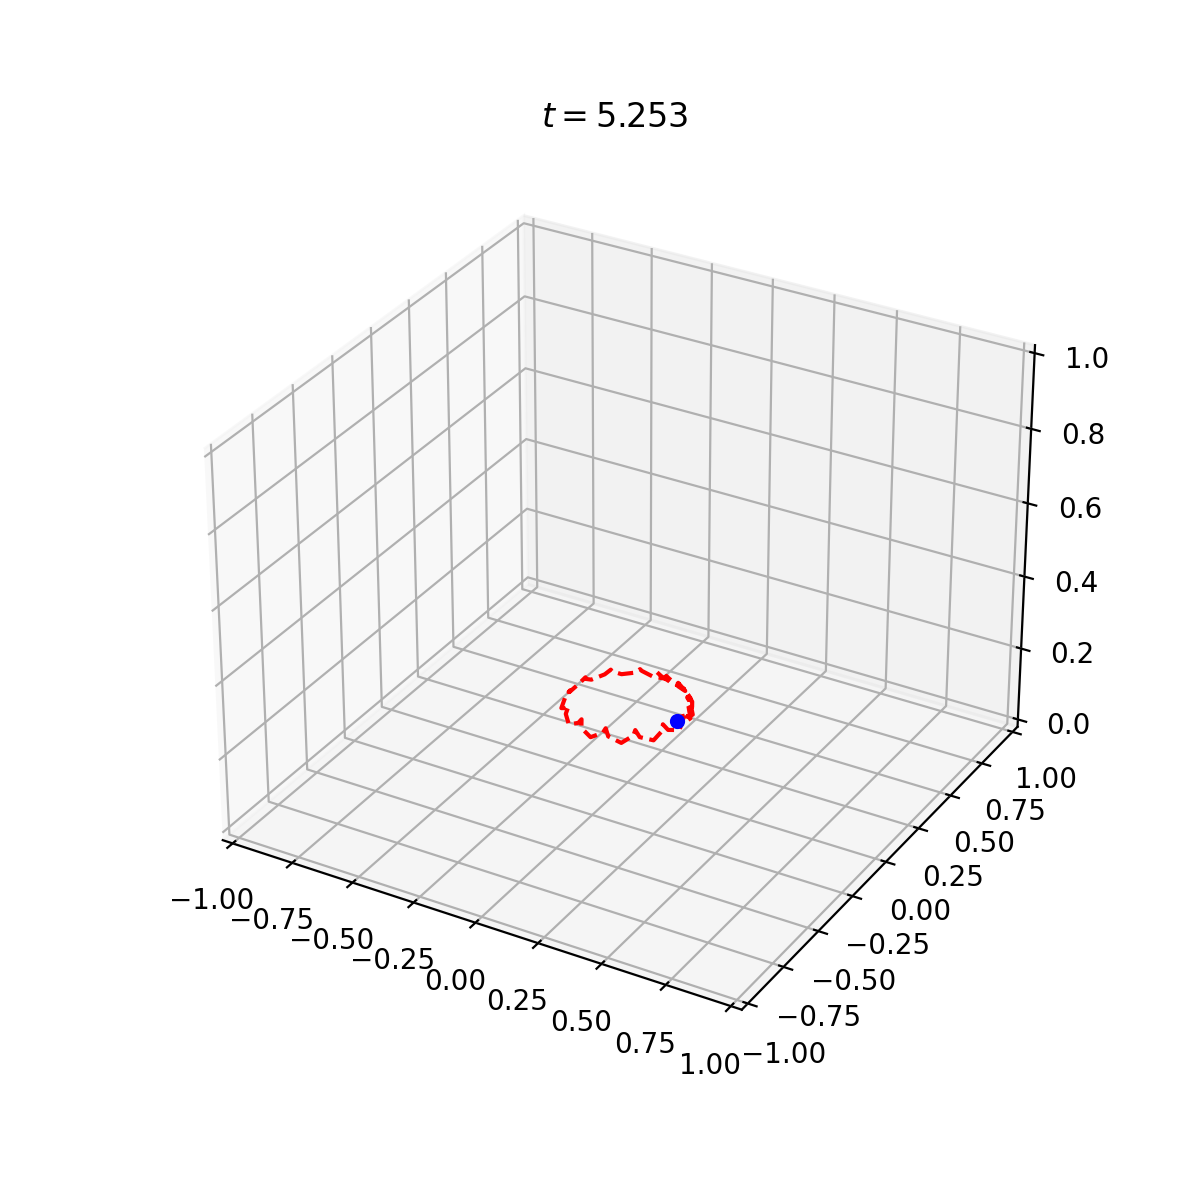

In [9]:
#codigo realizado con la ayuda de chat gpt

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")

def init_():
    ax.clear()
    ax.set_zlim(0, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlim(-1, 1)

def Resultados(i):
    init_()
    ax.plot(x[:i], y[:i], z[:i], "--", color='r')
    ax.scatter(x[i], y[i], z[i], color='b')
    ax.set_title(r"$t = %s$" % (round(t[i], 3)))

Animation = anim.FuncAnimation(fig, Resultados, frames=len(t), init_func=init_, interval=10)
plt.show()


In [13]:
plt.plot(t, psi_sol, label='Psi')
plt.show()

In [14]:
np.mean(psi_sol)
#velocidad de precesion

1599.999999999993